In [1]:
import braingeneers
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys
import matplotlib.pyplot as plt
import numpy as np
import h5py
import braingeneers.utils.smart_open_braingeneers as smart_open
fs = 20000.0 

In [2]:
# path = "/home/kang/disk/Connectoid/chip11350/Trace_20220503_12_25_42v_chip11350_curated.zip"
# raw_data_path = "/home/kang/disk/Connectoid/chip11350/Trace_20220503_12_25_42v_chip11350.raw.h5"
path = "/home/kang/disk/Opto/20221019_ucsf/hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip"
raw_data_path = "/home/kang/disk/Opto/20221019_ucsf/hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5"
rec_chan = ephys.load_channels_maxwell(raw_data_path)
print(rec_chan.shape)
spike_data = analysis.read_phy_files(path)
neuron_data = spike_data.neuron_data[0]
spike_times = spike_data.train
# N = spike_data.N
print(len(spike_times))
print(spike_data.length) 


(984,)
38
1269869.3


In [10]:
ap = [butter_bandpass_filter(raw_sig[i], 300, 6000) for i in range(len(raw_sig))]
lfp = [butter_bandpass_filter(raw_sig[i], 0.01, 100) for i in range(len(raw_sig))]
delta = [butter_bandpass_filter(lfp[i], 0.5, 4) for i in range(len(raw_sig))]
theta = [butter_bandpass_filter(lfp[i], 4, 8) for i in range(len(raw_sig))]

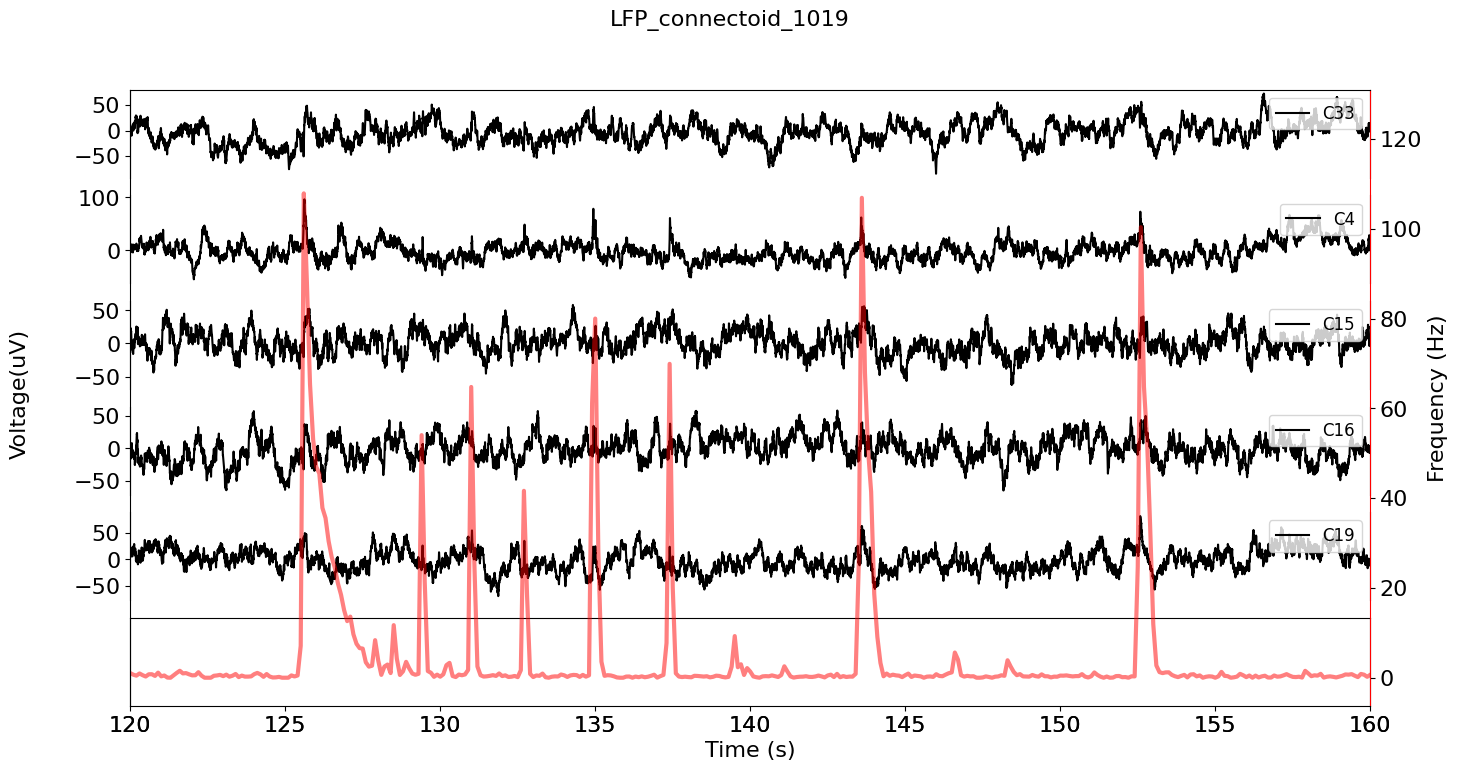

In [18]:
# all sub-bands
subbands = ['raw', 'AP', 'LFP', 'Delta', 'Theta']
signals = [raw_sig, ap, lfp, delta, theta]
signal_length = raw_sig.shape[1]
fig, axs = plt.subplots(len(cluster_index)+1, 1, figsize=(16, 8))
fig.set_facecolor('white')

xx = np.arange(0, signal_length / fs, 1/fs) + rec_period[0]
j = 2
fig.suptitle(subbands[j] + "_connectoid_1019", fontsize=16)
for i in range(len(cluster_index)):
    axs[i].plot(xx, signals[j][i], label="C" + str(cluster_index[i]), color='k')
    axs[i].legend(loc="upper right", fontsize=12)
    # axs[i].set_ylabel("Voltage (uV)", fontsize=16)
    axs[i].yaxis.set_tick_params(labelsize=16)
    axs[i].set_xticks([])
    axs[i].set_xlim(rec_period)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    # axs[i].set_xlim([776, 777])
i = len(cluster_index)
# axs[i].plot(xx, signals[j][i], label="C" + str(cluster_index[i]), color='k')
# axs[i].legend(loc="upper right", fontsize=12)
axs[i].yaxis.set_tick_params(labelsize=16)
axs[i].set_xlabel("Time (s)",  fontsize=16)
axs[i].xaxis.set_tick_params(labelsize=16)
axs[i].set_xlim(rec_period)
axs[i].spines['bottom'].set_visible(False)

# axs[i].set_xlim([776, 777])
# axs[i].set_xticks([])
axs[i].set_yticks([])
# axs[-1].set_xticks([])
# axs[-1].set_yticks([])
fig.text(0.05, 0.5, 'Voltage(uV)', va='center', rotation='vertical', fontsize=16)

# overlap firing rate with LFP
bins, rate = analysis.moving_fr_rate(spike_times)
bins = bins[1:]/1000
# st, end = np.searchsorted(bins, rec_period)
# selected
ax1 = fig.add_subplot(111, facecolor="none")
ax1.yaxis.set_label_position("right")
ax1.plot(bins, rate, color='r', alpha=0.5, linewidth=3)
ax1.set_xlim(rec_period)
# ax1.set_xlim([776, 777])
# ax1.set_ylim([0, max(rate)])
ax1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
ax1.set_ylabel("Frequency (Hz)",  fontsize=16)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.spines['right'].set_color('r')
plt.show()
# fig.savefig(subbands[j] + "_with_rate_opto1019_120_160_C19C16C15C4C33.png", dpi=300)
# TODO rms for each frequency band